# Customer Review Project

## Problem statement

**_Context_**

Alma is a french company that offers the easiest way for merchants to offer payment in multiple payments (x2/x3/x4) or deferred payments. Alma is an omnichannel solution and can therefore be used in your shop and/or for your e-commerce site.

In this project I will show you how to realiaze an analysis to determine what customers think about Alma and their service. 

I made a python script to scrape all review from Trustpilot, stock all the data in a Google Spreadsheets via API and process a word frequency analysis. 

Scraping was done with beautiful soup. The analysis was done using nltk/matplotlib

The results are very encouraging for the customer service of Alma

**_Instructions_**

1. Scrap website of trustpilot to get all the data we will use
2. Clear the data if necessary and Export data to a GS that we will conect via our API (This data will be stocked there and everytime we run this script, we will update the GS)
3. Analysis
4. Conclusions


## Scrap Website of Trustpilot

In [1]:
#Import necessary libraries
import requests
import re
import numpy as np
from bs4 import BeautifulSoup
from tqdm import tqdm

In [2]:
url = 'https://fr.trustpilot.com/review/getalma.eu'
page = requests.get(url)
soup = BeautifulSoup(page.content)

In [3]:
nb_reviews_string = soup.find('span', class_="typography_typography__QgicV typography_bodysmall__irytL typography_color-gray-7__9Ut3K typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3 styles_text__W4hWi").text
nb_reviews = re.sub("[^0-9]","", nb_reviews_string)
print(f'The number of reviews for Alma is {nb_reviews}.')

The number of reviews for Alma is 2481.


In [4]:
#Create list with number of pages
l = []
for i in range(1, 120):
    l.append(i)
print(len(l))

119


In [5]:
#Get all review pages
urls = []
for i in l:
    url = 'https://fr.trustpilot.com/review/getalma.eu?page={}'.format(i)
    urls.append(url)
len(urls)

119

In [6]:
#Test 1 link
url_review_1 = urls[1]
page = requests.get(url_review_1)
print(page)
page_1 = BeautifulSoup(page.content)

<Response [200]>


In [7]:
#Informations to scrap
#Name
#Number of Reviews
#Country
#Rating
#Full comment
#Date

In [8]:
#Build an empty dictionary to stock all the data
dic = {'name' : [], 'nb_reviews_page': [], 'country' : [], 'rating' :[], 'commentaire' : [], 'date' : []}

#Loop to get the data for each review for all pages (urls) of the trustpilot website
for url in tqdm(urls) : 

    page = requests.get(url)
    product = BeautifulSoup(page.content)

    #NAME
    name = product.find_all('div', class_='typography_typography__QgicV typography_bodysmall__irytL typography_weight-medium__UNMDK typography_fontstyle-normal__kHyN3 styles_consumerName__dP8Um')
    for i in name :
        dic['name'].append(i.text)

    #NB Reviews // Country 
    liste = []
    nb_reviews_page = product.find_all('div', {'class':'typography_typography__QgicV typography_bodysmall__irytL typography_color-gray-6__TogX2 typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3 styles_detailsIcon__Fo_ua'})
    for y in nb_reviews_page:
        liste.append(y.text)
    liste1 = liste[::2]
    liste2 = liste[1::2]
    for z in liste1 :
        dic['nb_reviews_page'].append(z)
    for r in liste2 :
        dic['country'].append(r)

    #Reviews
    reviews = product.find_all('section', {'class' : 'styles_reviewContentwrapper__zH_9M'})
    for e in reviews:
        try : 
            dic['commentaire'].append(e.find('p', {'data-service-review-text-typography':'true'}).text)
        except : 
            dic['commentaire'].append(np.nan)
            
    #Date + Rating
    for u in reviews:
        #dic['date'].append(u.find('time', {'data-service-review-date-time-ago' : 'true'})['datetime'])
        try :
            dic['date'].append(u.find('time', {'data-service-review-date-time-ago' : 'true'})['datetime'])
            dic['rating'].append(float(u.find('div', {'class' :'styles_reviewHeader__iU9Px' })['data-service-review-rating']))
        except :
            pass
print(len(dic))

100%|██████████| 119/119 [01:08<00:00,  1.73it/s]

6


In [9]:
#Verify lengih before printing
print(len(dic['name']))
print(len(dic['nb_reviews_page']))
print(len(dic['country']))
print(len(dic['rating']))
print(len(dic['commentaire']))
print(len(dic['date']))

2380
2380
2380
2380
2380
2380


In [10]:
import pandas as pd

In [11]:
#Clear Dataframe before saving it
df = pd.DataFrame(dic)
df['nb_reviews_page'] = df['nb_reviews_page'].str.replace(" avis","")

,name,nb_reviews_page,country,rating,commentaire,date
0,BRIGITTE GAMONDES,1,FR,5.0,Pratique pour des montants élevés. Merci,2022-04-11T07:35:18.000Z
1,Guy Albert GALLDY,1,MQ,5.0,C’est top 👍🏾 j’apprécie énormément l’accueil e...,2022-04-11T00:48:09.000Z
2,Anna,2,FR,5.0,"Super, très très satisfaite! Tout est super ra...",2022-04-10T19:13:48.000Z
3,Yves Mertz,6,FR,5.0,NaN,2022-04-10T16:12:54.000Z
4,Jean-Claude,5,FR,5.0,"Simple d’utilisation, réponse immédiate, en un...",2022-04-10T12:12:18.000Z
...,...,...,...,...,...,...
2375,Jean Tartarin,2,FR,5.0,"Super pratique comme service, 0 soucis, interf...",2020-11-20T11:35:41.000Z
2376,Linda lili,2,FR,5.0,Très contente de ce moyen de paiement en plusi...,2020-11-20T11:21:44.000Z
2377,Elsa likikouet,2,FR,5.0,Efficace et facile a prendre,2020-11-20T10:54:53.000Z
2378,Greg Duhamel,1,FR,5.0,Mobilier acheté chez The Cool Republic. Hyper ...,2020-11-20T10:52:54.000Z


In [12]:
#Count number of nan by column
pd.DataFrame(dic).isna().sum()

name                 0
nb_reviews_page      0
country              0
rating               0
commentaire        622
date                 0
dtype: int64

In [15]:
#Save doc on my folder
df.to_csv('data_Alma_CSV.csv', encoding='utf-8', index=False)

In [16]:
print(len(df.values))

2380


## Export to GS

In [17]:
!pip install gspread==5.3.0

In [18]:
import gspread

In [19]:
#Insert the path to your json account here
path = 'level-chassis-345709-4deccf52db36.json'
gc = gspread.service_account(filename=path)


In [20]:
#Insert the id of your spreadsheet where you wanna stock the data
file = gc.open_by_key('1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg').sheet1
worksheet = file
worksheet

<Worksheet 'Feuille 1' id:0>

In [21]:
#This function is to clear the document every time we execute this script. Remove it if you wanna stock your data
worksheet.clear()

{'spreadsheetId': '1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg',
 'clearedRange': "'Feuille 1'!A1:Z16000"}

In [22]:
worksheet.append_row(list(df.columns))

{'spreadsheetId': '1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg',
 'updates': {'spreadsheetId': '1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg',
  'updatedRange': "'Feuille 1'!A1:F1",
  'updatedRows': 1,
  'updatedColumns': 6,
  'updatedCells': 6}}

In [23]:
#Its necessary to fill df with '' because does not accept nans
df = df.fillna('')
df

,name,nb_reviews_page,country,rating,commentaire,date
0,BRIGITTE GAMONDES,1,FR,5.0,Pratique pour des montants élevés. Merci,2022-04-11T07:35:18.000Z
1,Guy Albert GALLDY,1,MQ,5.0,C’est top 👍🏾 j’apprécie énormément l’accueil e...,2022-04-11T00:48:09.000Z
2,Anna,2,FR,5.0,"Super, très très satisfaite! Tout est super ra...",2022-04-10T19:13:48.000Z
3,Yves Mertz,6,FR,5.0,,2022-04-10T16:12:54.000Z
4,Jean-Claude,5,FR,5.0,"Simple d’utilisation, réponse immédiate, en un...",2022-04-10T12:12:18.000Z
...,...,...,...,...,...,...
2375,Jean Tartarin,2,FR,5.0,"Super pratique comme service, 0 soucis, interf...",2020-11-20T11:35:41.000Z
2376,Linda lili,2,FR,5.0,Très contente de ce moyen de paiement en plusi...,2020-11-20T11:21:44.000Z
2377,Elsa likikouet,2,FR,5.0,Efficace et facile a prendre,2020-11-20T10:54:53.000Z
2378,Greg Duhamel,1,FR,5.0,Mobilier acheté chez The Cool Republic. Hyper ...,2020-11-20T10:52:54.000Z


In [24]:
worksheet.update('A2', df.values.tolist())

{'spreadsheetId': '1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg',
 'updatedRange': "'Feuille 1'!A2:F2381",
 'updatedRows': 2380,
 'updatedColumns': 6,
 'updatedCells': 14280}

In [25]:
#Check your spreadsheets
#url = https://docs.google.com/spreadsheets/d/1Ju8TeGJtARGHnAL8LizQ31vBirCQKQixgvTvz42eRqg/edit?usp=sharing

## Analysis

In [26]:
from nltk.corpus import stopwords

final_stopwords_list = stopwords.words('french')

In [27]:
#There still a lot of stop words, so we will add them to our dictionary and clear again the df
extra_words = ['a', 'cest', 'je', 'bonjouroui', 'leurs', 'foidtrès']

In [28]:
final_stopwords = final_stopwords_list + extra_words

In [29]:
#We create a copy to do not modify main dataframe
df_test = df.copy()

In [39]:
df_test['commentaire sans stop words'] = df_test['commentaire'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))

In [31]:
df_clean = pd.DataFrame(df_test)

In [32]:
df_clean['commentaire sans stop words'][0]

'Pratique montants élevés. Merci'

In [40]:
#Since we want to get the Word Frequency it is better to convert the text to a lower case and to remove the punctuations.
df_clean['mytext_new'] = df_clean['commentaire sans stop words'].str.lower().str.replace('[^\w\s]','')

new_df = df_clean.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df.head(15)

C:\Users\SAIDEL~1\AppData\Local\Temp/ipykernel_37456/1345038256.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['mytext_new'] = df_clean['commentaire sans stop words'].str.lower().str.replace('[^\w\s]','')


,Word,Frequency
0,très,666
1,bien,380
2,paiement,376
3,fois,332
4,rapide,225
5,je,213
6,merci,211
7,cest,194
8,sans,193
9,service,187


In [34]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from os import path
from wordcloud import WordCloud

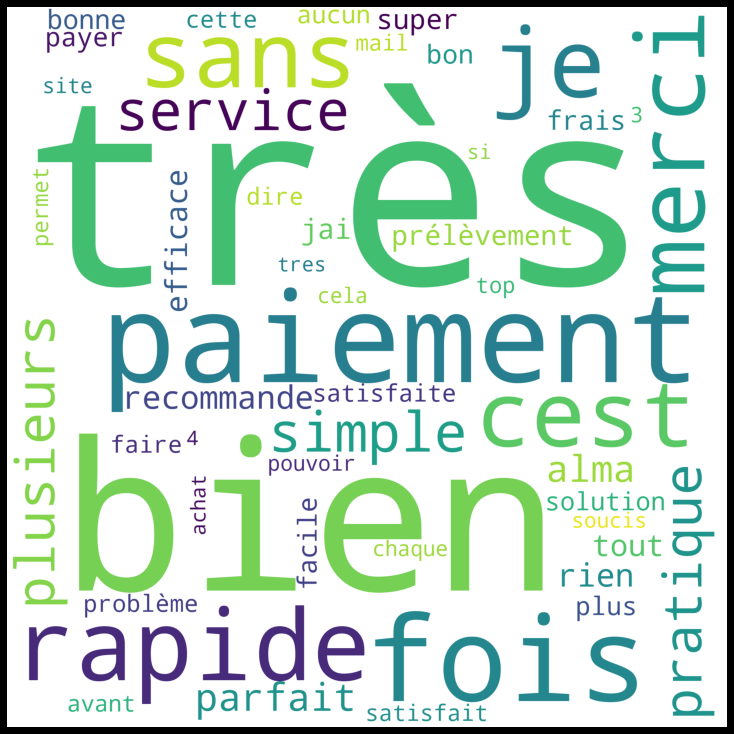

In [36]:
word_freq = dict(zip(new_df.Word, new_df.Frequency))

wc = WordCloud(background_color="white",width=2000,height=2000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq)

#plt.imshow(wc)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Conclusion